# СЕМИНАР 4: ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ, ПРОВЕРКА ГИПОТЕЗ

Основано на: https://github.com/XuMuK1/psmo/blob/master/seminars/Seminar_5.ipynb;

https://github.com/pileyan/applied_statistics_2024/tree/master?tab=readme-ov-file 

## Тестирование гипотез
$H_0$ нулевая гипотеза против альтернативной

![](https://github.com/SchattenGenie/hse-stats-course-2019/blob/master/seminar-notes/03_tests/stat_errors.png)

В статистике различаются два вида ошибок:
  * $\alpha$ - ошибка первого рода -- когда мы отвергаем гипотезу, а она верна;
  * $\beta$ - ошибка второго рода -- когда мы __не__ отвергаем гипотезу, а она не верна.
    (т.е. неверно приняли приняли нулевую гипотезу)
  
  
![](https://openlab-flowers.inria.fr/uploads/default/original/2X/7/703b9d4e3037b266e8fc6b20e020eb84d4405a80.png)


$$p\mathrm{-value} = 1 - \int\limits_{-\infty}^{t_{\alpha}} p_{H_0}(t) dt$$

## Доверительные интервалы. Нормальное распределение с неизвестным средним и известной дисперсией

**Задача.** Сравнить на выборках размера 50 для $\mathcal{N}(\theta,4)$ доверительные интервалы:
(1) теоретический, (2) на основе параметрического бутстрэпа, (3) на основе непараметрического бутстрэпа. Сам параметр $\theta$ сгенерировать из равномерного распределения на $[-5,5]$. 

In [2]:
import numpy as np 
from scipy import stats 

In [3]:
np.random.seed(123)

In [4]:
# Фиксируем параметры задачи

n = 50 # размер выборки 
alpha = 0.05 # параметр ошибки

theta = np.random.uniform(-5,5) # неизвестное среднее нормального распределения
sigma = 2 # известная sigma нормального распределения

In [5]:
# Сгенерируем выборку из нужного распределения
sample = np.random.normal(theta, sigma, size=n)

In [9]:
print("Значение theta равно",theta)

Значение theta равно 1.9646918559786162


### Теоретический доверительный интервал

Напомним, что теоретический доверительный интервал вычисляется следующим образом: 

$$
\mathbb{P}\left( \bar{X} - \frac{c_{1-\alpha/2}\sigma}{\sqrt{n}} < \mu < \bar{X} + \frac{c_{1-\alpha/2}\sigma}{\sqrt{n}} \right) = 1-\alpha,
$$
где $c_{\alpha}$ — квантиль распределения $\mathcal{N}(0,1)$ уровня $\alpha$.

In [8]:
# Вычисляем теоретический доверительный интервал

CI_Theoretical = [np.mean(sample) - stats.norm.ppf(1-alpha/2)*sigma/np.sqrt(n), np.mean(sample) + stats.norm.ppf(1-alpha/2)*sigma/np.sqrt(n)]
print("Теоретический доверительный интервал равен", CI_Theoretical)

Теоретический доверительный интервал равен [1.1210678915076362, 2.2297909509873786]


### Доверительный интервал на основе параметрического бутстрэпа

In [32]:
# Параметры для бутстрэпа
number_of_bootstrap_samples = 20 # количество бутстрэп-выборок
size_of_bootstrap_samples = 50 # размер бутстрэп-выборок

In [27]:
# Оцениваем неизвестный параметр theta 
mean = np.mean(sample) 
print(mean)

1.6754294212475074


In [33]:
# Генерируем выборку из распределения N(sample_mean, sigma)
bootstrap_samples = np.random.normal(mean,sigma,size=[number_of_bootstrap_samples,size_of_bootstrap_samples]) 
bootstrap_samples

array([[ 2.43637798e-01,  6.20267791e+00,  3.38133733e+00,
         2.18443252e-01, -2.31676364e+00,  2.69780680e+00,
         3.66245277e+00,  2.13917611e+00,  1.51585533e+00,
         1.60204574e+00,  1.60544264e+00,  1.18153716e+00,
         1.65098549e+00,  1.45328914e+00,  3.31805646e+00,
         4.05612211e+00,  2.93102443e+00,  4.75472166e+00,
         3.70667347e+00,  4.79800253e+00,  3.02692125e+00,
         2.04774151e+00,  4.97372030e+00,  1.28553320e-01,
         4.92697854e+00,  1.52370590e+00,  4.37732688e+00,
         2.60636823e+00,  4.50804573e-01,  8.92605520e-01,
         5.79824557e+00,  9.55316767e-01,  4.99073786e+00,
         4.59745369e+00,  1.63686515e+00, -1.34076422e-01,
         2.97458659e+00, -1.59335473e-01,  5.85235885e+00,
         4.09672995e+00, -1.61060052e+00,  3.29595327e+00,
         1.34756467e+00,  1.03722183e-01,  2.87630748e+00,
        -1.80895800e+00,  2.75337067e-01,  2.72478848e-01,
        -2.55201681e-01,  6.42112643e-01],
       [ 4.06

In [34]:
# Считаем среднее для каждой выборки 
bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)
bootstrap_estimates

array([2.19009698, 1.78290622, 1.72509376, 1.46935124, 1.5332605 ,
       0.88718486, 1.5671919 , 2.26679173, 1.87627005, 1.72860293,
       2.01160611, 1.92969146, 1.81780193, 1.67147006, 1.66525036,
       1.53426726, 1.72536582, 1.39106169, 1.98990643, 1.68341449])

In [35]:
# Вычисляем параметрический бутстрэп доверительный интервал
CI_Bootstrap_Parametric = [np.quantile(bootstrap_estimates,alpha/2), np.quantile(bootstrap_estimates,1-alpha/2)]
print("Доверительный интервал на основе парметрического бустрэпа равен", CI_Bootstrap_Parametric)

Доверительный интервал на основе парметрического бустрэпа равен [1.1265263535557792, 2.230361721252668]


### Доверительный интервал на основе непараметрического бутстрэпа

In [36]:
# Будем использовать те же параметры
number_of_bootstrap_samples = 20 # количество бутстрэп-выборок
size_of_bootstrap_samples = 50 # размер бутстрэп-выборок

In [37]:
# Генерируем выборку из распределения N(bootstrap_mean, sigma)
bootstrap_samples = np.random.choice(sample,size=[number_of_bootstrap_samples,size_of_bootstrap_samples]) 
bootstrap_samples

array([[ 3.01017679e+00,  2.60890399e+00, -1.59421775e+00,
         5.30149508e+00,  4.31330615e+00,  2.03467802e+00,
         4.31330615e+00,  6.68789438e+00,  2.63944010e+00,
         2.51618667e+00,  4.69389222e-01, -2.63236978e-01,
         4.69389222e-01,  4.31330615e+00,  4.95634491e+00,
         5.72729504e-01, -1.74658308e+00,  2.70639651e+00,
         5.14627272e-01,  3.45785304e+00,  4.67554494e-01,
         5.72729504e-01,  3.11818390e+00,  4.95634491e+00,
         1.67794691e+00, -8.55910552e-01,  4.73809737e-01,
         5.92338872e+00,  2.77760005e+00, -1.27390827e+00,
         5.44143212e+00, -1.74658308e+00, -2.63236978e-01,
         2.70639651e+00,  5.44143212e+00,  1.86165641e+00,
         5.14627272e-01,  4.95634491e+00,  5.72729504e-01,
         1.86165641e+00,  1.99176895e+00,  5.30149508e+00,
        -1.74658308e+00, -1.58357626e+00,  1.67794691e+00,
         1.67794691e+00, -8.55910552e-01,  4.73809737e-01,
         1.99176895e+00,  3.41452231e+00],
       [-1.27

In [38]:
# Считаем среднее для каждой выборки 
bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)
bootstrap_estimates

array([1.97617538, 1.70601574, 0.7984111 , 1.64513562, 1.80689677,
       1.5695383 , 1.93867409, 1.9885709 , 2.03803952, 1.9043253 ,
       1.94794061, 2.1712448 , 1.40899533, 1.39022148, 0.81473367,
       2.14682853, 1.433418  , 2.19859083, 1.4895543 , 1.02209914])

In [39]:
# Вычисляем непараметрический бутстрэп доверительный интервал
CI_Bootstrap_Nonparametric = [np.quantile(bootstrap_estimates,alpha/2), np.quantile(bootstrap_estimates,1-alpha/2)]
print("Доверительный интервал на основе (непарметрического) бустрэпа равен", CI_Bootstrap_Nonparametric)

Доверительный интервал на основе (непарметрического) бустрэпа равен [0.8061643217231121, 2.1856014651822555]


### Как сравнить полученные доверительные интервалы? 

Можно попробовать сравнить длину полученных доверительных интервалов. 
Будет ли длина хорошей оценкой качества интервалов?

In [40]:
print("Длина теоретического доверительного интервала: ", CI_Theoretical[1]-CI_Theoretical[0])
print("Длина доверительного интервала на основе парметрического бустрэпа: ", CI_Bootstrap_Parametric[1]-CI_Bootstrap_Parametric[0])
print("Длина доверительного интервала на основе непарметрического бустрэпа: ", CI_Bootstrap_Nonparametric[1]-CI_Bootstrap_Nonparametric[0])

Длина теоретического доверительного интервала:  1.1087230594797424
Длина доверительного интервала на основе парметрического бустрэпа:  1.1038353676968888
Длина доверительного интервала на основе непарметрического бустрэпа:  1.3794371434591435


Проверим, с какой частотой истинное значение параметра попадает в данные доверительные интервалы

In [ ]:
N_samples = 10000 # количество "экспериментов" по вычислению доверительных интервалов

theoretical = np.zeros(N_samples) # здесь будем хранить результаты для теоретического доверительного интервала
parametric_bootstrap = np.zeros(N_samples) # здесь будем хранить результаты для параметрического бутстрэпа 
nonparametric_bootstrap = np.zeros(N_samples) # здесь будем хранить результаты для непараметрического бутстрэпа 

In [47]:
# Вычисляем теоретический доверительный интервал
def Theoretical(sample,alpha):
    n = len(sample)
    mean = np.mean(sample)
    return [mean - stats.norm.ppf(1-alpha/2)*sigma/np.sqrt(n), mean + stats.norm.ppf(1-alpha/2)*sigma/np.sqrt(n)]


# Вычисляем доверительный интервал на основе параметрического бутстрэпа
def Parametric_bootstrap(sample,alpha,number_of_bootstrap_samples,size_of_bootstrap_samples):
    n = len(sample)
    mean = np.mean(sample)
    bootstrap_samples = np.random.normal(mean,sigma,size=[number_of_bootstrap_samples,size_of_bootstrap_samples]) 
    bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)
    return [np.quantile(bootstrap_estimates,alpha/2), np.quantile(bootstrap_estimates,1-alpha/2)]

# Вычисляем доверительный интервал на основе непараметрического бутстрэпа
def Nonparametric_bootstrap(sample,alpha,number_of_bootstrap_samples,size_of_bootstrap_samples):
    bootstrap_samples = np.random.choice(sample,size=[number_of_bootstrap_samples,size_of_bootstrap_samples]) 
    bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)
    return [np.quantile(bootstrap_estimates,alpha/2), np.quantile(bootstrap_estimates,1-alpha/2)]



In [45]:
# Проведем N_samples экспериментов
for i in range(N_samples):
    sample = np.random.normal(theta, sigma, size=n)
    # теоретические интервалы
    CI_Theoretical = Theoretical(sample,alpha)
    theoretical[i] = (theta >= CI_Theoretical[0]) and (theta <= CI_Theoretical[1])
    
    CI_parametric_bootstrap = Parametric_bootstrap(sample,alpha,number_of_bootstrap_samples,size_of_bootstrap_samples)
    parametric_bootstrap[i] = (theta >= CI_parametric_bootstrap[0]) and (theta <= CI_parametric_bootstrap[1])
    
    CI_nonparametric_bootstrap = Nonparametric_bootstrap(sample,alpha,number_of_bootstrap_samples,size_of_bootstrap_samples)
    nonparametric_bootstrap[i] = (theta >= CI_nonparametric_bootstrap[0]) and (theta <= CI_nonparametric_bootstrap[1])

In [46]:
print("Частота попадания истинного параметра в доверительный интервал:")
print("- для теоретического доверительного интервала ", np.mean(theoretical))
print("- для параметрического бутстрэп доверительного интервала ", np.mean(parametric_bootstrap))
print("- для непараметрического бутстрэп доверительного интервала ", np.mean(nonparametric_bootstrap))

Частота попадания истинного параметра в доверительный интервал:
- для теоретического доверительного интервала  0.9531
- для параметрического бутстрэп доверительного интервала  0.874
- для непараметрического бутстрэп доверительного интервала  0.8662


## Доверительные интервалы. Распределение Бернулли с неизвестной вероятностью успеха

**Задача.** Пусть дана выборка из распределения Бернулли (можно считать, например, это это клики по рекламному баннеру в Интернете) длины $n=290$ и вероятностью успеха, равномерно распределенной на $[0.01,0.05]$. Оценить параметр успеха. Построить для него асимптотический доверительный интервал, основанный на центральной предельной теореме

In [52]:
# Фиксируем параметры задачи

n = 290 # размер выборки 
alpha = 0.05 # параметр ошибки

p = np.random.uniform(0.01,0.05) # неизвестный параметр успеха

In [54]:
# Сгенерируем выборку из нужного распределения
np.random.seed(123)

sample = np.random.binomial(1,p, size=n)
sample

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [55]:
print("Истинное значение параметра: ",p)
print("Оценка вероятности успеха: ",np.mean(sample))

Истинное значение параметра:  0.012500631503380936
Оценка вероятности успеха:  0.020689655172413793


In [76]:
import statsmodels.stats.proportion 

CI_Normal = statsmodels.stats.proportion.proportion_confint(sum(sample), n, alpha, method = 'normal')
print("Асимптотический доверительный интервал на основе ЦПТ равен ", CI_Normal)

Асимптотический доверительный интервал на основе ЦПТ равен  (0.002455961465066315, 0.021544038534933686)


## Критерии согласия

### Критерий Колмогорова

Начнем с критерия согласия Колмогорова. Этот критерий проверяет простую гипотезу о принадлежности выборки некоторому (непрерывному!) закону распределения. Критерий Колмогорова реализован с помощью функции kstest в модуле stats:

* **stats.kstest(sample, cdf)** — тут sample — реализация нашей выборки и cdf — функция распределения закона, с которым сравниваем.

In [59]:
n = 500 # размер выборки
sample1 = np.random.rand(n) # выборка 1 из равномерного распределения на [0,1]
sample2 = np.random.beta(2,2,size = n) # выборка 2 из бета-распределения с параметрами (2,2)

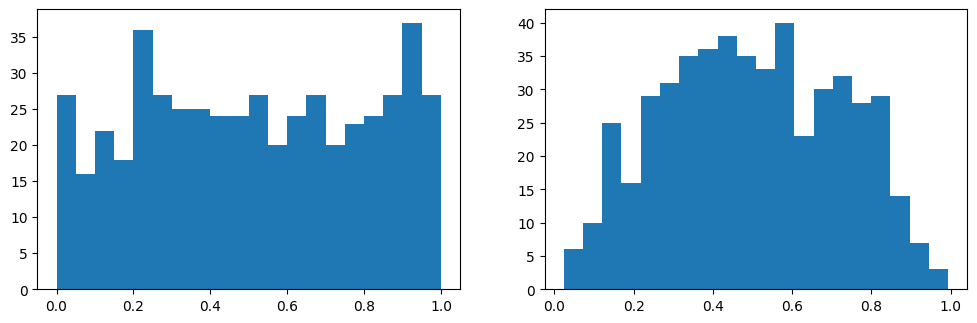

In [60]:
import matplotlib.pyplot as plt
# давайте сначала посмотрим на гистограммы для sample1 и sample2

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(sample1, bins=20)
plt.subplot(2,2,2)
plt.hist(sample2, bins=20)
plt.show()

In [61]:
# Запускаем критерий Колмогорова для sample1, 
# проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1].
# Должны получить большой p-value (что будет означать, что значение статистики попало в область вероятных значений).

stats.kstest(sample1, stats.uniform.cdf)

KstestResult(statistic=0.03630411784843271, pvalue=0.5133683917128447, statistic_location=0.20430411784843272, statistic_sign=-1)

In [62]:
# Запускаем критерий Колмогорова для sample2, 
# проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1].
# Должны получить малый p-value (что будет означать, что значение статистики попало в область маловероятных значений).

stats.kstest(sample2, stats.uniform.cdf)

KstestResult(statistic=0.107059197161369, pvalue=1.9127450922173138e-05, statistic_location=0.229059197161369, statistic_sign=-1)

In [63]:
# Запускаем критерий Колмогорова для sample1, 
# проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2).
# Обратите внимание на то, как передавать параметры для функции плотности.

stats.kstest(sample1, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.12766288199249642, pvalue=1.45596519646345e-07, statistic_location=0.8038433161189259, statistic_sign=-1)

In [64]:
# Запускаем критерий Колмогорова для sample2, 
# проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2).

stats.kstest(sample2, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.0187016461717614, pvalue=0.9935646671358351, statistic_location=0.44463934326027016, statistic_sign=1)

### Критерий хи-квадрат

Теперь перейдем к критерию согласия хи-квадрат. Этот критерий реализован с помощью функции chisquare в модуле stats:
    
* **stats.chisquare(obs, exp)** — тут obs — количества попаданий в каждую "ячейку" и exp — ожидаемые количества попаданий в каждую "ячейку".

P.S. Обратите внимание на то, что мы передаем в функцию chisquare не вероятности (эмпирические и истинные), а количества!

В экспериментах с селекцией гороха Мендель наблюдал частоты различных видов семян, получаемых при скрещивании растений с круглыми желтыми семенами и растений с морщинистыми зелеными семенами. Эти данные и значения теоретических вероятностей, определяемые в соответствии с законом Менделя, приведены в следующей таблице:

| Тип семян            | Частота | Вероятность |
|:-------------------- |:-------:| -----------:|
| Круглые и желтые     | 315/556 | 9/16        |
| Морщинистые и желтые | 101/556 | 3/16        |
| Круглые и зеленые    | 108/556 | 3/16        |
| Морщинистые и зеленые| 32/556  | 1/16        |

Необходимо проверить гипотезу $H_0$ о согласованности частот с теоретическими вероятностями при помощи критерия хи-квадрат.

In [65]:
# занесем данные из таблицы в массивы

obs = np.array([315/556, 101/556, 108/556, 32/556])
exp = np.array([9/16, 3/16, 3/16, 1/16])

# вспомним о том, что в функцию chisquare мы должны передавать количества, а не частоты

obs = obs*556
exp = exp*556

In [66]:
# запускаем критерий хи-квадрат

stats.chisquare(obs, exp)

Power_divergenceResult(statistic=0.4700239808153487, pvalue=0.9254258951036157)

###  Проверка нормальности

Очень важный тип критериев согласия — это проверка нормальности. На лекции мы изучали следующие методы: 

* **qqplot(sample, dist, line='r')** — построение квантильного графика (Q-Q Plot) — визуальная проверка любого критерия согласия о масштабе/сдвиге. Аргументы: sample — наша выборка, dits — распределение, с которым сравниваем (если этот параметр не указан, то используется нормальное распределение), line='r' — подгоняет прямую под облако точек, чтобы было проще визуально сравнивать.
* **stats.shapiro(sample)** — критерий Шапиро-Уилка. Аргументы: sample — наша выборка.
* **stats.jarque_bera(sample)** — критерий Харке-Бера. Аргументы: sample — наша выборка.

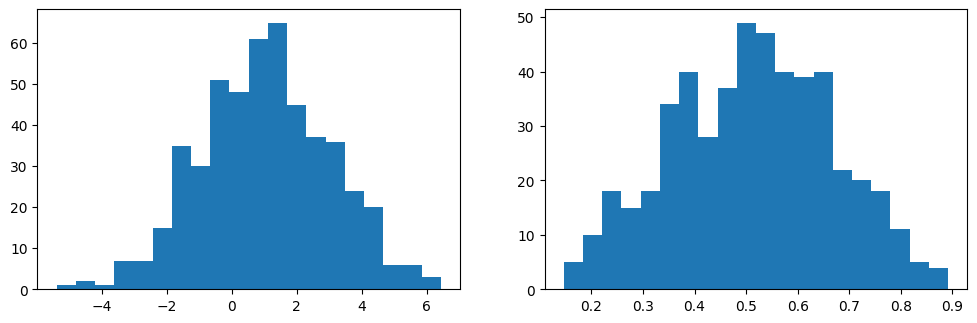

In [69]:
# поменяем размер выборки, если нужно
n = 500

sample1 = np.random.normal(1,2, size=n) # выборка из нормального распределения
sample2 = np.random.beta(5,5,size = n) # выборка из бета-распределения с параметрами (2,2)

# нарисуем гистограммы 

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(sample1, bins=20)
plt.subplot(2,2,2)
plt.hist(sample2, bins=20)
plt.show()

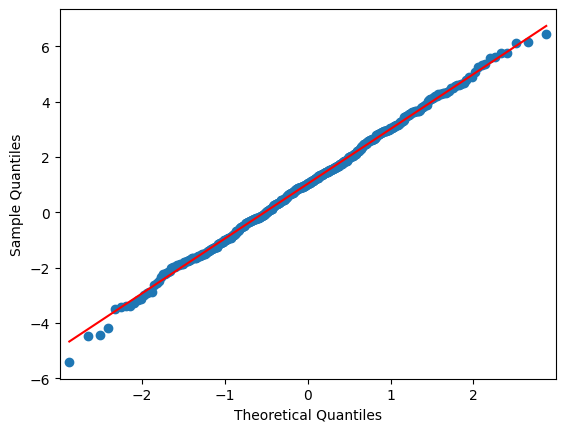

In [70]:
from statsmodels.graphics.gofplots import qqplot

# график квантилей для sample1

qqplot(sample1, line='s')
plt.show()

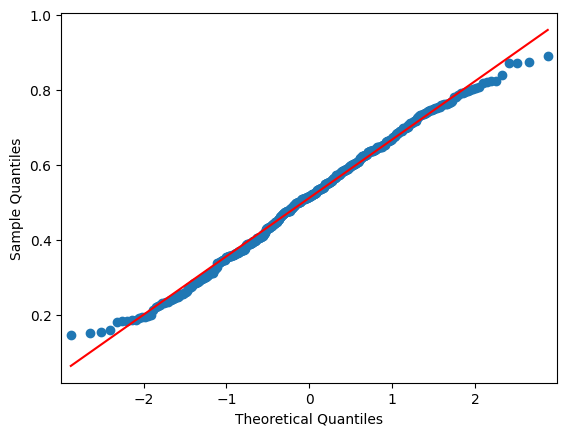

In [71]:
# график квантилей для sample2

qqplot(sample2, line='s')
plt.show()

In [72]:
# запускаем критерий Шапиро-Уилка для sample1

stats.shapiro(sample1)

ShapiroResult(statistic=0.9982630440373872, pvalue=0.9017678709536948)

In [73]:
# запускаем критерий Шапиро-Уилка для sample2

stats.shapiro(sample2)

ShapiroResult(statistic=0.9925704084063859, pvalue=0.013836117697595704)

In [74]:
# запускаем критерий Харке-Бера для sample1

stats.jarque_bera(sample1)

SignificanceResult(statistic=0.15707929658468708, pvalue=0.9244654057302518)

In [75]:
# запускаем критерий Харке-Бера для sample2

stats.jarque_bera(sample2)

SignificanceResult(statistic=6.744126095809051, pvalue=0.034318763007926335)

В статистике известно большое количество критериев согласия и далеко не все из них реализованы в Python.
(Почти) полный список того, что реализовано в Python можно найти в официальной документации: https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats.

Если в официальной документации Вы не найдете нужного критерия, гуглите. Вполне возможно, что критерий, который Вам нужен уже реализован.